In [1]:
!pip3 install keras

Keras used Tensorflow as backend. Also using keras means less amount of code to write.

In [2]:
from keras.utils import np_utils
from keras.datasets import mnist
import seaborn as sns
from keras.initializers import RandomNormal

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time

In [4]:
# this function is used to update the plots of each epoch and error
def plt_dynamic(x,vy,ty,ax,xolrs=['b']):
    ax.plot(x,vy,'b',label="Validation Loss")
    ax.plot(x,ty,'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [5]:
# loading mnist dataset from keras
(X_train, y_train), (X_test, y_test)= mnist.load_data()

In [6]:
print ("Number of training examples :", X_train.shape[0], "and each image is of shape", X_train[0].shape)
print ("Number of test examples :", X_test.shape[0], "and each image is of shape", X_test[0].shape)

Number of training examples : 60000 and each image is of shape (28, 28)
Number of test examples : 10000 and each image is of shape (28, 28)


In [7]:
X_train.shape

(60000, 28, 28)

In [9]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [8]:
# shape of image we have (28*28) vector
# we have to convert the input image in one dimensional vector (1*784)

X_train=X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1])

ValueError: cannot reshape array of size 47040000 into shape (60000,28)

In [10]:
print (X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [11]:
# normalising all training and test data
X_train=X_train/255
X_test=X_test/255

In [12]:
# here we have class labels as number i.e., 1,2,3,....
# we have to convert our class labels into one hot encoder vector
# for multilayer perceptron we need a vector as classlabel

print ("Class label of first image", y_train[0])

y_train=np_utils.to_categorical(y_train, 10)
y_test=np_utils.to_categorical(y_test, 10)

print ("After converting the output into a vector:", y_train[0])

Class label of first image 5
After converting the output into a vector: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Softmax Classifier

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [14]:
# some model parameters

output_dim=10
input_dim=X_train.shape[1]

batch_size=128
nb_epoch=20

In [15]:
# start building a model
model=Sequential()

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [16]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch,verbose=1, validation_data=(X_test, y_test) )

Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 1.2830 - accuracy: 0.6945 - val_loss: 0.8046 - val_accuracy: 0.8332
Epoch 2/20
469/469 [==============================] - 1s 1ms/step - loss: 0.7167 - accuracy: 0.8388 - val_loss: 0.6034 - val_accuracy: 0.8640
Epoch 3/20
469/469 [==============================] - 1s 1ms/step - loss: 0.5881 - accuracy: 0.8583 - val_loss: 0.5227 - val_accuracy: 0.8758
Epoch 4/20
469/469 [==============================] - 1s 1ms/step - loss: 0.5265 - accuracy: 0.8681 - val_loss: 0.4777 - val_accuracy: 0.8829
Epoch 5/20
469/469 [==============================] - 1s 1ms/step - loss: 0.4888 - accuracy: 0.8754 - val_loss: 0.4478 - val_accuracy: 0.8880
Epoch 6/20
469/469 [==============================] - 1s 1ms/step - loss: 0.4629 - accuracy: 0.8798 - val_loss: 0.4268 - val_accuracy: 0.8913
Epoch 7/20
469/469 [==============================] - 1s 1ms/step - loss: 0.4437 - accuracy: 0.8832 - val_loss: 0.4109 - val_accuracy: 0.8945
Epoch 

Test score: 0.3343583643436432
Test accuracy: 0.909600019454956


<IPython.core.display.Javascript object>


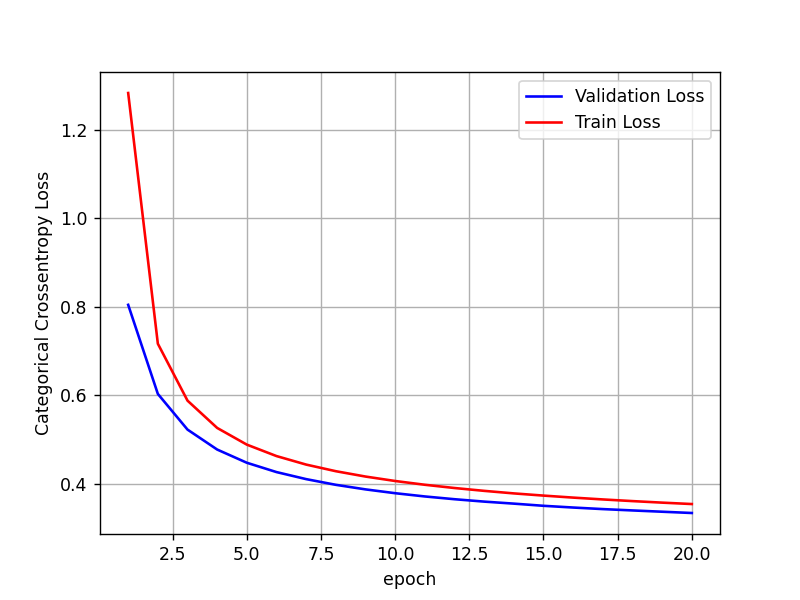

In [17]:
score=model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

fig,ax=plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# lost of epoch numbers
x=list(range(1,nb_epoch+1))

vy=history.history['val_loss']
ty=history.history['loss']
plt_dynamic(x,vy,ty,ax)

### MLP + Sigmoid activation + SGDoptimizer

In [18]:
# Multilayer perceptron

model_sigmoid=Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [19]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history2=model_sigmoid.fit(X_train,y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1,  validation_data=(X_test, y_test))

Epoch 1/20
469/469 [==============================] - 2s 5ms/step - loss: 2.2773 - accuracy: 0.2023 - val_loss: 2.2277 - val_accuracy: 0.2780
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 2.1854 - accuracy: 0.4547 - val_loss: 2.1316 - val_accuracy: 0.5745
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 2.0727 - accuracy: 0.5767 - val_loss: 1.9942 - val_accuracy: 0.6396
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 1.9120 - accuracy: 0.6318 - val_loss: 1.8037 - val_accuracy: 0.6493
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 1.6992 - accuracy: 0.6685 - val_loss: 1.5674 - val_accuracy: 0.7056
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 1.4624 - accuracy: 0.7068 - val_loss: 1.3323 - val_accuracy: 0.7416
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 1.2450 - accuracy: 0.7426 - val_loss: 1.1337 - val_accuracy: 0.7727
Epoch 

Test score: 0.45633116364479065
Test accuracy: 0.8783000111579895


<IPython.core.display.Javascript object>


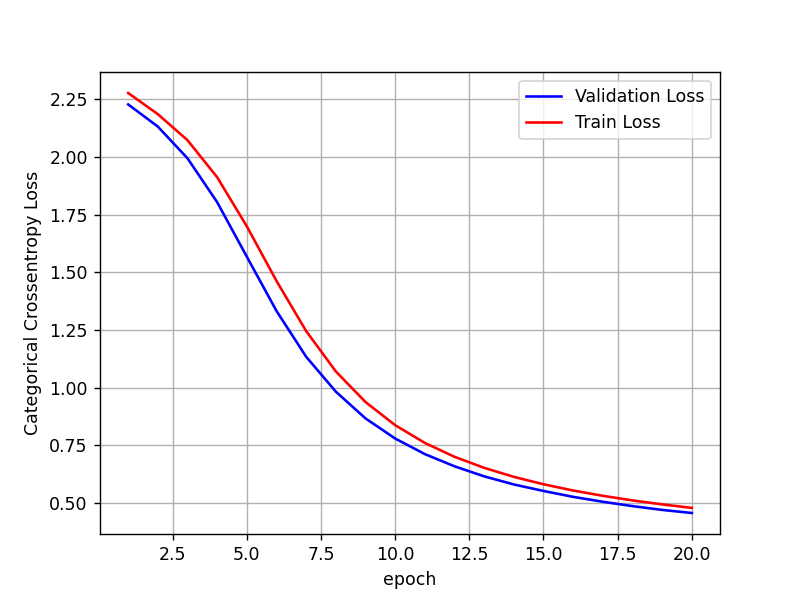

In [20]:
score=model_sigmoid.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

fig,ax=plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x=list(range(1,nb_epoch+1))

vy=history2.history['val_loss']
ty=history2.history['loss']
plt_dynamic(x,vy,ty,ax)

<IPython.core.display.Javascript object>


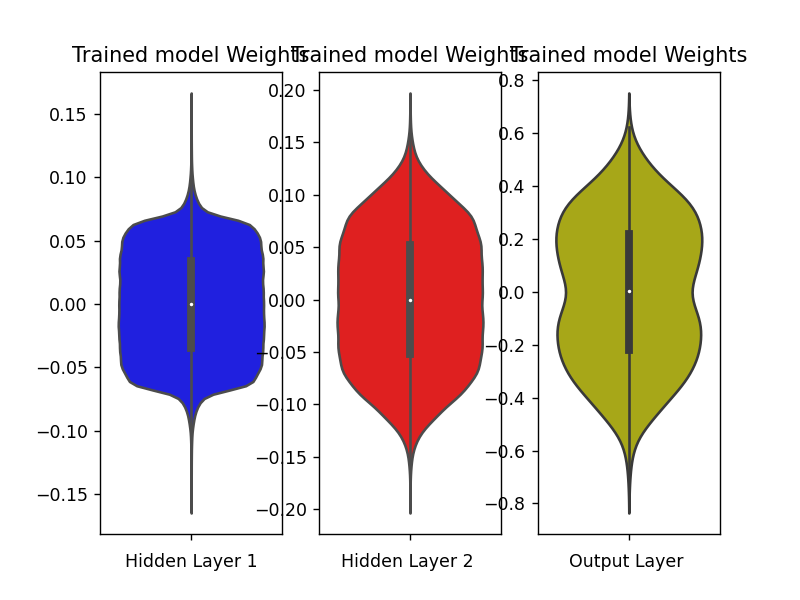

In [21]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

 <h2>MLP + Sigmoid activation + ADAM </h2>

In [24]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 dense_11 (Dense)            (None, 128)               65664     
                                                                 
 dense_12 (Dense)            (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.5296 - accuracy: 0.8591 - val_loss: 0.2506 - val_accuracy: 0.9294
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2230 - accuracy: 0.9351 - val_loss: 0.1867 - val_accuracy: 0.9441
Epoch 3/20
469/469 [========

Test score: 0.06717666983604431
Test accuracy: 0.9815000295639038


<IPython.core.display.Javascript object>


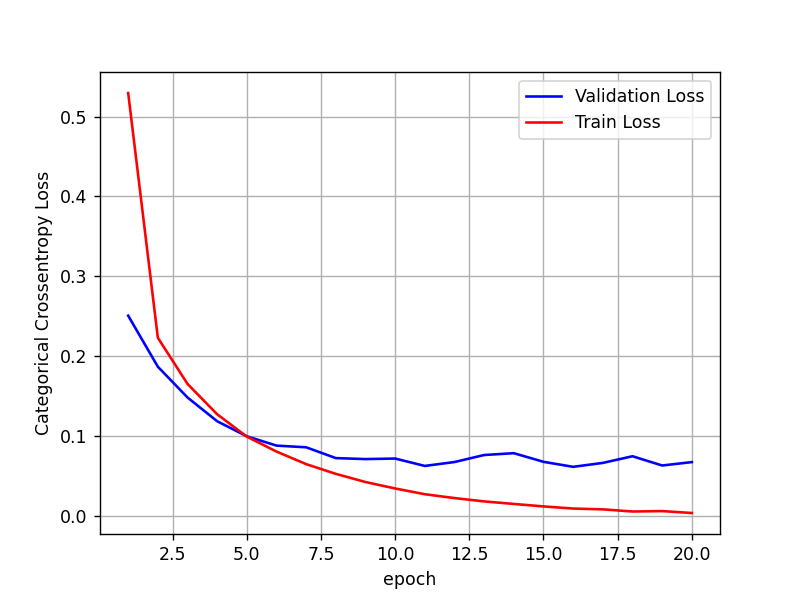

In [25]:
score = model_sigmoid.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


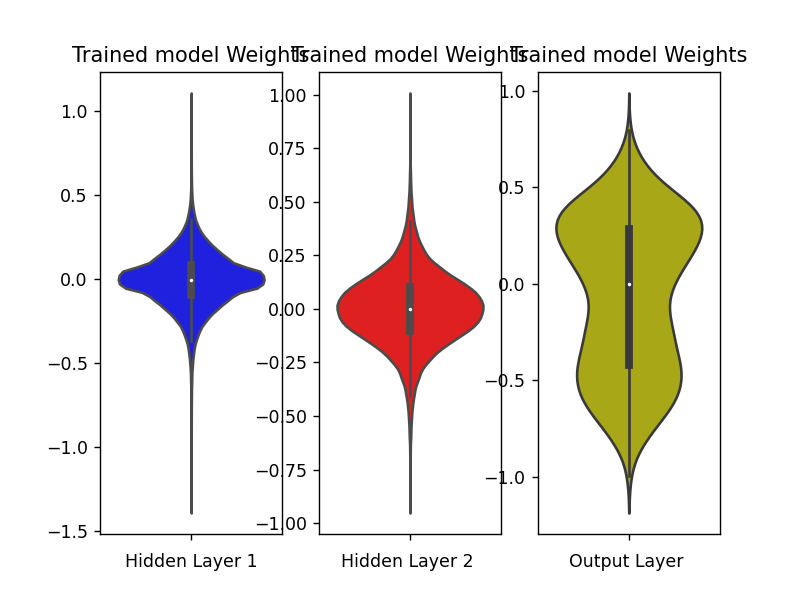

In [26]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + ReLU +SGD </h2>

In [27]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in)  = 0.125  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 512)               401920    
                                                                 
 dense_14 (Dense)            (None, 128)               65664     
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [29]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Epoch 1/20
469/469 [==============================] - 2s 5ms/step - loss: 0.7255 - accuracy: 0.7965 - val_loss: 0.3776 - val_accuracy: 0.8937
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3481 - accuracy: 0.9026 - val_loss: 0.2993 - val_accuracy: 0.9143
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2886 - accuracy: 0.9177 - val_loss: 0.2581 - val_accuracy: 0.9242
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2553 - accuracy: 0.9276 - val_loss: 0.2342 - val_accuracy: 0.9324
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2318 - accuracy: 0.9347 - val_loss: 0.2152 - val_accuracy: 0.9382
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2136 - accuracy: 0.9400 - val_loss: 0.2007 - val_accuracy: 0.9404
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1986 - accuracy: 0.9441 - val_loss: 0.1909 - val_accuracy: 0.9450
Epoch 

Test score: 0.12013502418994904
Test accuracy: 0.964900016784668


<IPython.core.display.Javascript object>


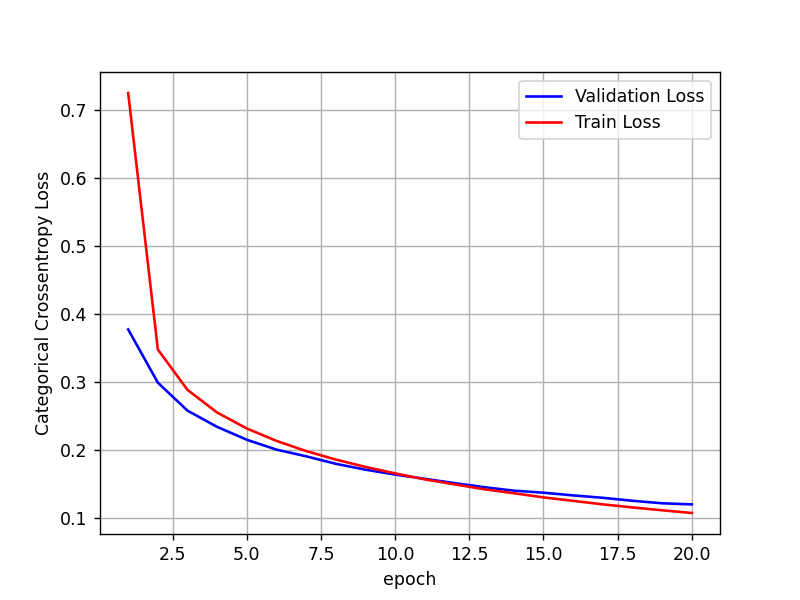

In [30]:
score = model_relu.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


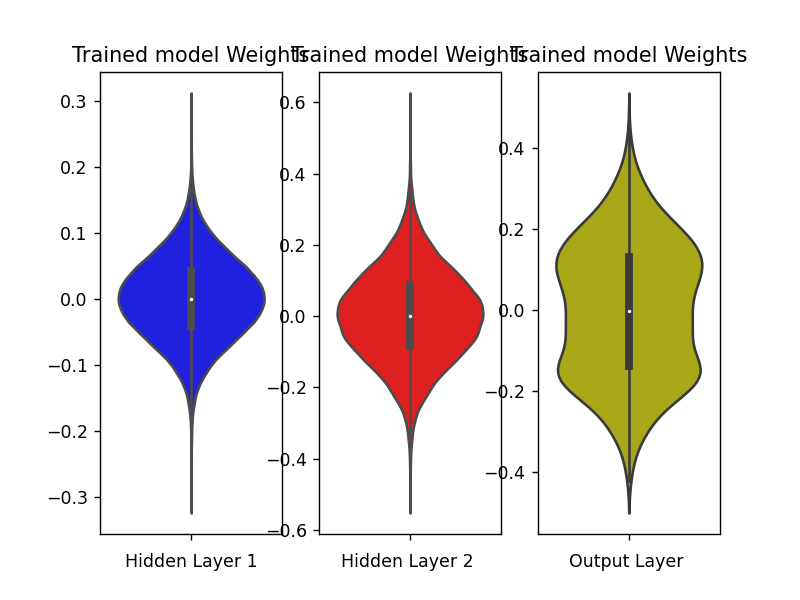

In [31]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + ReLU + ADAM </h2>

In [32]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 512)               401920    
                                                                 
 dense_17 (Dense)            (None, 128)               65664     
                                                                 
 dense_18 (Dense)            (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2234 - accuracy: 0.9329 - val_loss: 0.1120 - val_accuracy: 0.9664
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0857 - accuracy: 0.9735 - val_loss: 0.0792 - val_accuracy: 0.9763
Epoch 3/20
469/469 [===

Test score: 0.09071993827819824
Test accuracy: 0.9814000129699707


<IPython.core.display.Javascript object>


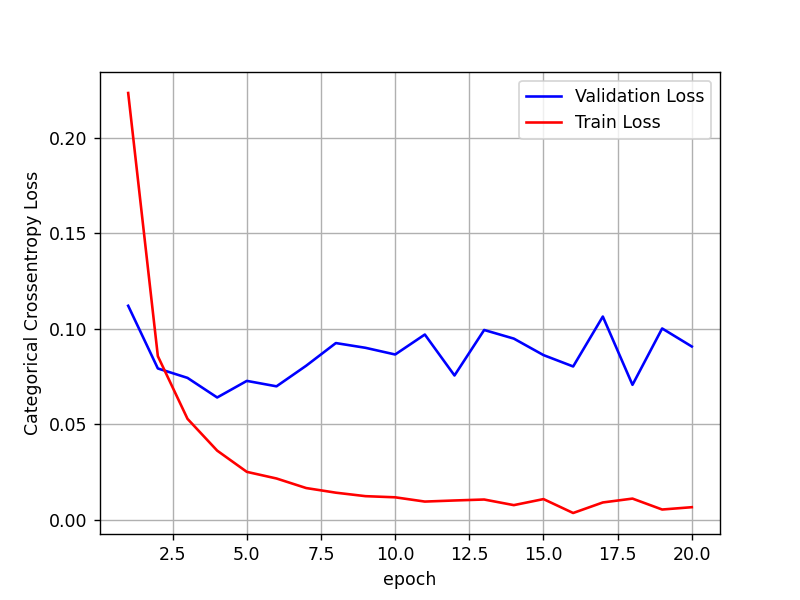

In [33]:
score = model_relu.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


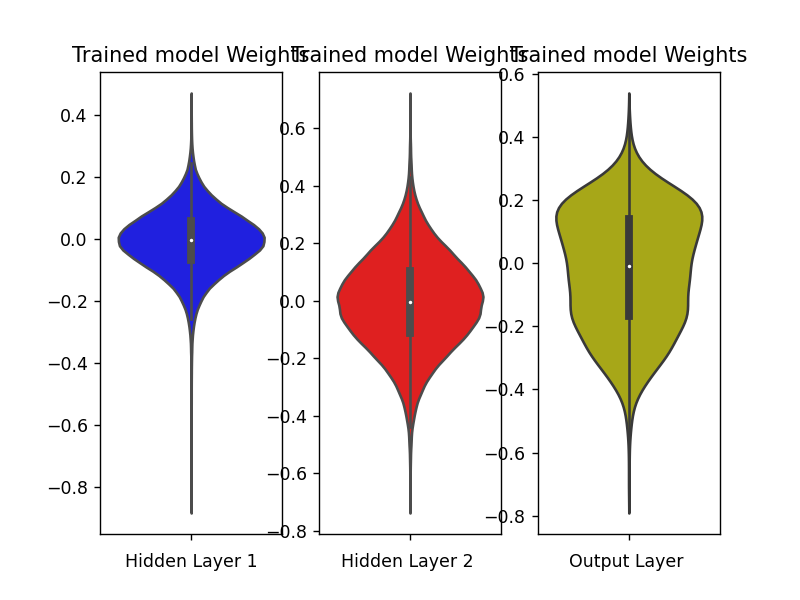

In [34]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + Batch-Norm on hidden Layers + AdamOptimizer </2>

In [36]:
pip install --upgrade tensorflow

  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.13.0
    Uninstalling google-auth-2.13.0:
      Successfully uninstalled google-auth-2.13.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.6.1
    Uninstalling tensorboard-data-server-0.6.1:
      Successfully uninstalled tensorboard-data-server-0.6.1
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\garga\\anaconda3\\Lib\\site-packages\\google\\~rotobuf\\internal\\_api_implementation.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [38]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from tensorflow.keras.layers import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_20 (Dense)            (None, 128)               65664     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_21 (Dense)            (None, 10)                1290      
                                                                 
Total params: 471,434
Trainable params: 470,154
Non-tr

In [39]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Epoch 1/20
469/469 [==============================] - 4s 6ms/step - loss: 0.3099 - accuracy: 0.9078 - val_loss: 0.2041 - val_accuracy: 0.9421
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1740 - accuracy: 0.9489 - val_loss: 0.1611 - val_accuracy: 0.9539
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1346 - accuracy: 0.9599 - val_loss: 0.1450 - val_accuracy: 0.9589
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1119 - accuracy: 0.9664 - val_loss: 0.1330 - val_accuracy: 0.9579
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0952 - accuracy: 0.9708 - val_loss: 0.1259 - val_accuracy: 0.9615
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0803 - accuracy: 0.9750 - val_loss: 0.1141 - val_accuracy: 0.9644
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0684 - accuracy: 0.9786 - val_loss: 0.1110 - val_accuracy: 0.9677
Epoch 

Test score: 0.10426751524209976
Test accuracy: 0.9729999899864197


<IPython.core.display.Javascript object>


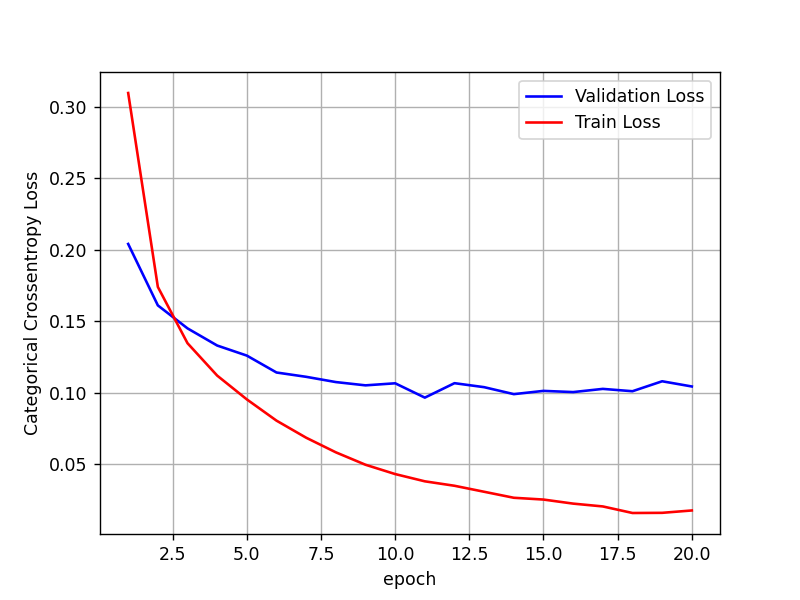

In [40]:
score = model_batch.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


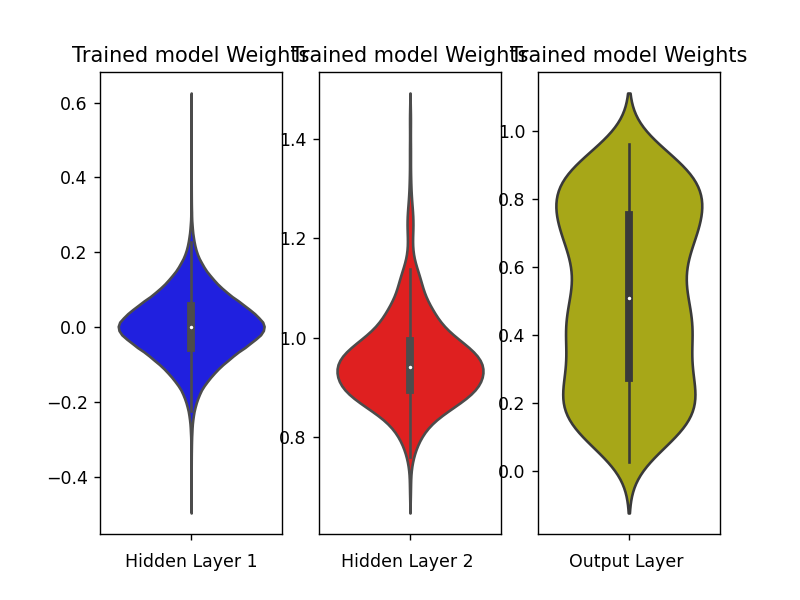

In [41]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 5. MLP + Dropout + AdamOptimizer </h2>

In [42]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from tensorflow.keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_2 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_23 (Dense)            (None, 128)               65664     
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)              

In [43]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Epoch 1/20
469/469 [==============================] - 5s 8ms/step - loss: 0.6711 - accuracy: 0.7908 - val_loss: 0.2859 - val_accuracy: 0.9124
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.4292 - accuracy: 0.8691 - val_loss: 0.2514 - val_accuracy: 0.9255
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3834 - accuracy: 0.8836 - val_loss: 0.2358 - val_accuracy: 0.9287
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3584 - accuracy: 0.8913 - val_loss: 0.2201 - val_accuracy: 0.9333
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3356 - accuracy: 0.8972 - val_loss: 0.2126 - val_accuracy: 0.9371
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3233 - accuracy: 0.9025 - val_loss: 0.1997 - val_accuracy: 0.9395
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3091 - accuracy: 0.9064 - val_loss: 0.1895 - val_accuracy: 0.9433
Epoch 

Test score: 0.10475190728902817
Test accuracy: 0.9684000015258789


<IPython.core.display.Javascript object>


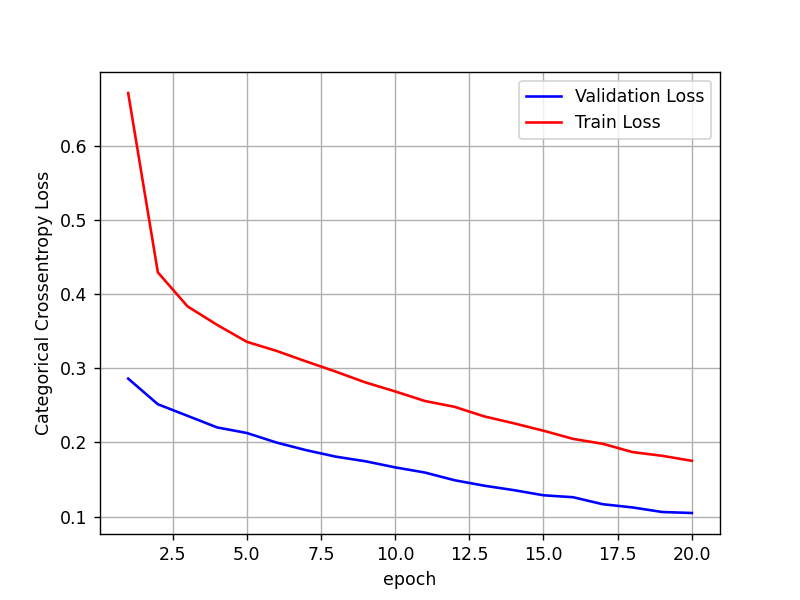

In [44]:
score = model_drop.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


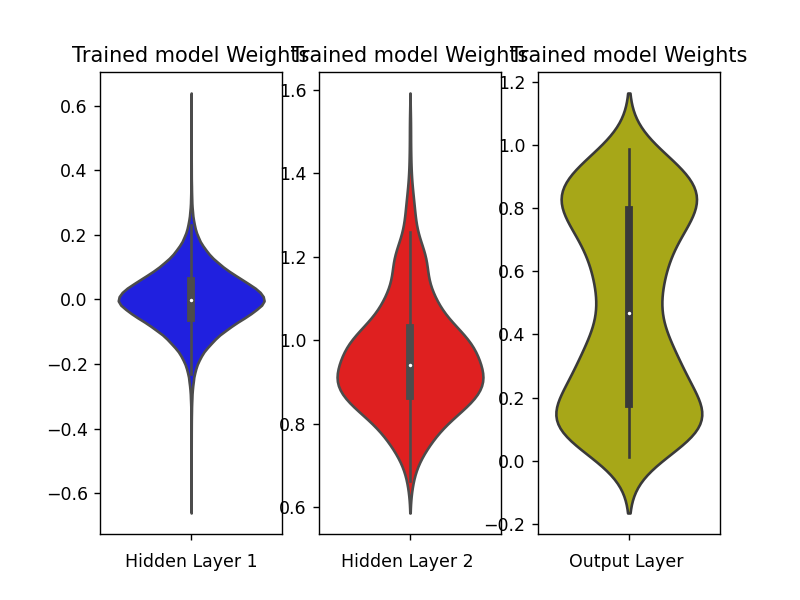

In [45]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()